In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "data/misc/ok_pan_1km_grid.shp"
original_grid = gd.read_file(grid_path)
original_grid = original_grid.set_index('id')
grid = original_grid

In [4]:
chg_path = "data/challenger_speed_tests/chg_40_entity_64077_challenger_speed_tests_valid_certified.csv"
chg_data = pd.read_csv(chg_path, parse_dates=['timestamp'])
chg = gd.GeoDataFrame(chg_data, geometry=gd.points_from_xy(chg_data.longitude, chg_data.latitude)).set_crs("EPSG:4326").to_crs(grid.crs)

In [6]:
chg[chg['provider_name'] == 'Verizon']

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,provider_name,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
11,36.928308,-100.8374,2018-05-17 08:40:00-05:00,-109.56,6.09,443,70,Verizon,73,6824,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2495,1401,POINT (-11225168.021 4429118.553)
33,36.848690,-100.9633,2018-05-17 09:44:00-05:00,-109.04,13.76,300,70,Verizon,73,6824,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2484,1393,POINT (-11239183.145 4418037.058)
39,36.847781,-100.9015,2018-05-17 09:51:00-05:00,0.00,0.00,0,70,Verizon,73,6824,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2489,1392,POINT (-11232303.600 4417910.607)
94,36.892601,-100.8916,2018-05-17 10:48:00-05:00,-105.57,10.87,591,70,Verizon,73,6824,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2490,1397,POINT (-11231201.537 4424147.306)
117,36.848717,-100.9262,2018-05-17 11:09:00-05:00,0.00,0.00,0,70,Verizon,73,6824,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2487,1392,POINT (-11235053.192 4418040.814)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616899,36.506079,-102.0233,2018-11-09 17:04:00-06:00,-113.44,3.30,237,70,Verizon,73,640,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2388,1360,POINT (-11357181.805 4370482.374)
2616901,36.506761,-102.0233,2018-11-09 17:04:00-06:00,-113.00,2.49,71,70,Verizon,73,640,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2388,1360,POINT (-11357181.805 4370576.827)
2616909,36.505892,-102.0233,2018-11-09 17:04:00-06:00,-113.38,3.01,464,70,Verizon,73,640,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2388,1360,POINT (-11357181.805 4370456.476)
2616915,36.507857,-102.0234,2018-11-09 17:04:00-06:00,-112.25,2.23,78,70,Verizon,73,640,1,G-NetTrack Pro Version 12.9 - 16.3,Oklahoma,64077,40,2388,1360,POINT (-11357192.937 4370728.617)


In [5]:
chg.groupby('provider_name').count()

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
provider_name,,,,,,,,,,,,,,,,,
AT&T,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866,244866
T-Mobile,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460,805460
Verizon,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597,1566597


In [6]:
att_path = "./data/fcc477/2018_06/AT_T_Mobility_83.shp"

att = gd.read_file(att_path).to_crs(grid.crs)

In [7]:
att_ok = gd.clip(att, grid)

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -10018315.016003424 3977516.0285555045 at -10018315.016003424 3977516.0285555045


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1510b92d5b20>

In [9]:
tmobile_path = "./data/fcc477/2018_06/T_Mobile_83.shp"

tmobile = gd.read_file(tmobile_path).to_crs(grid.crs)

In [10]:
tmobile_ok = gd.clip(tmobile, grid)

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point -9886020.3727472629 4216335.4875797005 at -9886020.3727472629 4216335.4875797005


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x15102e7e6e20>

In [ ]:
tmobile_ok.plot()

In [92]:
verizon_path = "data/fcc477/fcc_form477_verizon_panhandle.shp"
verizon = gd.read_file(verizon_path).to_crs(grid.crs)

<AxesSubplot:>

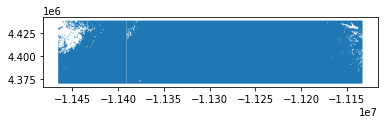

In [93]:
verizon.plot()

In [94]:
verizon_ok = gd.clip(verizon, grid)

In [95]:
# 0 is no signal strength, and in future calculations we consider 
# -120 signal strength to be no signal. As we use median power 
# the impacts to the mean this causes do not matter.
chg['signal_strength'] = chg['signal_strength'].replace(0,-120)

In [96]:
# this lables every point with a grid ID, collecting the grid IDs
# that have extant measurements
chg_grid = gd.sjoin(chg, grid, how='left', op='within')

In [99]:
chg_grid.groupby('index_right').median()['signal_strength']

index_right
27.0      -120.000
28.0      -120.000
29.0      -120.000
30.0      -120.000
31.0      -120.000
            ...   
23376.0   -106.920
23377.0   -109.290
23378.0   -107.125
23379.0   -103.570
23380.0   -100.000
Name: signal_strength, Length: 18315, dtype: float64

In [100]:
grid['med_rxpwr'] = chg_grid.groupby('index_right').median()['signal_strength']
grid = grid.dropna()

,left,top,right,bottom,geometry,med_rxpwr
id,,,,,,
27.0,-1.146618e+07,4.413429e+06,-1.146518e+07,4.412429e+06,"POLYGON ((-11466176.166 4413429.055, -11465176...",-120.000
28.0,-1.146618e+07,4.412429e+06,-1.146518e+07,4.411429e+06,"POLYGON ((-11466176.166 4412429.055, -11465176...",-120.000
29.0,-1.146618e+07,4.411429e+06,-1.146518e+07,4.410429e+06,"POLYGON ((-11466176.166 4411429.055, -11465176...",-120.000
30.0,-1.146618e+07,4.410429e+06,-1.146518e+07,4.409429e+06,"POLYGON ((-11466176.166 4410429.055, -11465176...",-120.000
31.0,-1.146618e+07,4.409429e+06,-1.146518e+07,4.408429e+06,"POLYGON ((-11466176.166 4409429.055, -11465176...",-120.000
...,...,...,...,...,...,...
23376.0,-1.113318e+07,4.374429e+06,-1.113218e+07,4.373429e+06,"POLYGON ((-11133176.166 4374429.055, -11132176...",-106.920
23377.0,-1.113318e+07,4.373429e+06,-1.113218e+07,4.372429e+06,"POLYGON ((-11133176.166 4373429.055, -11132176...",-109.290
23378.0,-1.113318e+07,4.372429e+06,-1.113218e+07,4.371429e+06,"POLYGON ((-11133176.166 4372429.055, -11132176...",-107.125


In [101]:
original_grid['centroid'] = original_grid['geometry'].centroid
original_grid = original_grid.set_geometry('centroid')
fcc_grid = gd.sjoin(original_grid, verizon, how="left", op="within").dropna()
original_grid = original_grid.set_geometry('geometry')
original_grid = original_grid.drop('centroid', axis=1)

,left,top,right,bottom,geometry,med_rxpwr,centroid,index_right,fid,DBA,Technology
id,,,,,,,,,,,
27.0,-1.146618e+07,4.413429e+06,-1.146518e+07,4.412429e+06,"POLYGON ((-11466176.166 4413429.055, -11465176...",-120.000,POINT (-11465676.166 4412929.055),743.0,744.0,VerizonWireless,83.0
28.0,-1.146618e+07,4.412429e+06,-1.146518e+07,4.411429e+06,"POLYGON ((-11466176.166 4412429.055, -11465176...",-120.000,POINT (-11465676.166 4411929.055),743.0,744.0,VerizonWireless,83.0
29.0,-1.146618e+07,4.411429e+06,-1.146518e+07,4.410429e+06,"POLYGON ((-11466176.166 4411429.055, -11465176...",-120.000,POINT (-11465676.166 4410929.055),743.0,744.0,VerizonWireless,83.0
30.0,-1.146618e+07,4.410429e+06,-1.146518e+07,4.409429e+06,"POLYGON ((-11466176.166 4410429.055, -11465176...",-120.000,POINT (-11465676.166 4409929.055),743.0,744.0,VerizonWireless,83.0
31.0,-1.146618e+07,4.409429e+06,-1.146518e+07,4.408429e+06,"POLYGON ((-11466176.166 4409429.055, -11465176...",-120.000,POINT (-11465676.166 4408929.055),743.0,744.0,VerizonWireless,83.0
...,...,...,...,...,...,...,...,...,...,...,...
23376.0,-1.113318e+07,4.374429e+06,-1.113218e+07,4.373429e+06,"POLYGON ((-11133176.166 4374429.055, -11132176...",-106.920,POINT (-11132676.166 4373929.055),742.0,743.0,VerizonWireless,83.0
23377.0,-1.113318e+07,4.373429e+06,-1.113218e+07,4.372429e+06,"POLYGON ((-11133176.166 4373429.055, -11132176...",-109.290,POINT (-11132676.166 4372929.055),742.0,743.0,VerizonWireless,83.0
23378.0,-1.113318e+07,4.372429e+06,-1.113218e+07,4.371429e+06,"POLYGON ((-11133176.166 4372429.055, -11132176...",-107.125,POINT (-11132676.166 4371929.055),742.0,743.0,VerizonWireless,83.0


In [111]:
grid['chg_coverage'] = grid['med_rxpwr'] > -110
grid['verizon_coverage'] = grid.index.isin(fcc_grid.index)

In [113]:
grid.to_file("./data/ok_pan_coverage.shp")